Script to eventually plot some attention layers of swin and deit as to show they behave
as feature extractors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [2]:
source_dir = "/home/vincent/Documenten/BachelorsProject/qualitative/"

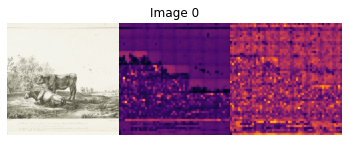

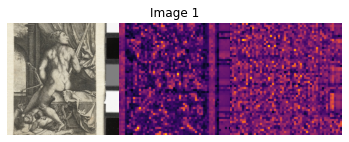

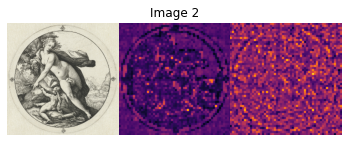

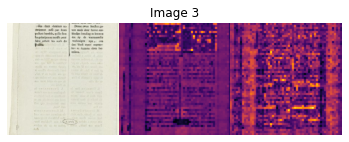

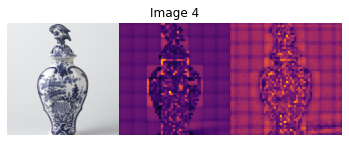

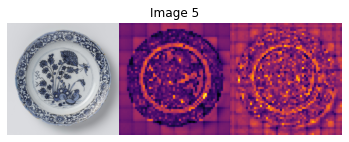

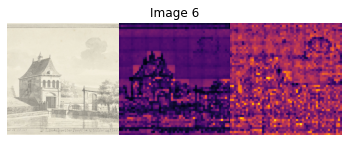

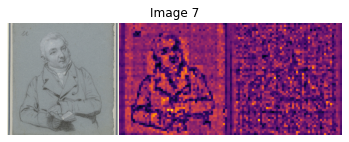

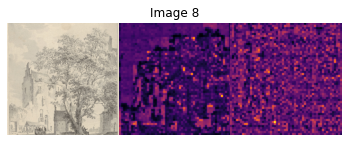

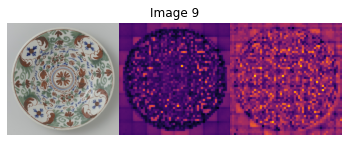

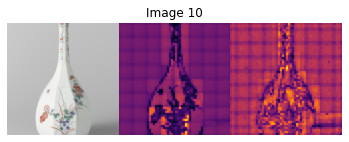

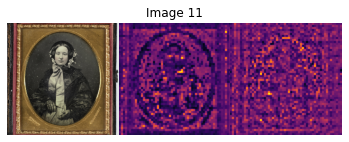

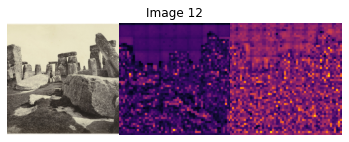

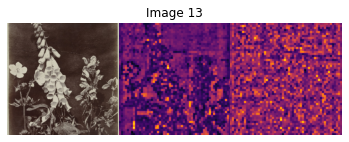

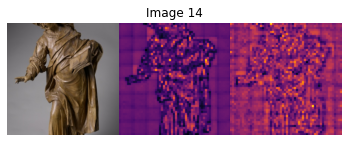

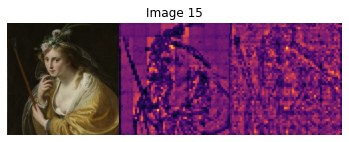

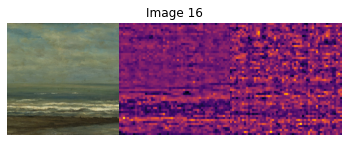

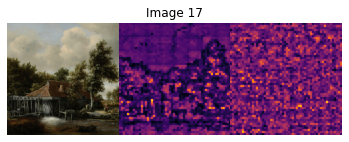

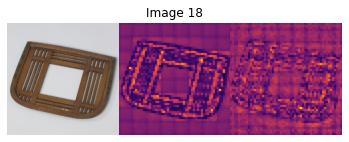

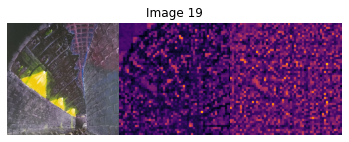

In [3]:
idx = 0
for idx in range(20):
    im = np.load(path.join(source_dir, f"img{idx:03}.npy"))
    
    with open(path.join(source_dir, f"swin_ots_img{idx:03}_layers.npy"), "br") as f:
        l = np.load(f)
        l2 = np.load(f)
    size = int(len(l) ** 0.5)
    l = l.mean(axis=0).reshape((size, size))
    l2 = l2.mean(axis=0).reshape((size, size))

    plt.imshow(im, extent=[0, 1, 0, 1])
    plt.imshow(l, extent=[1, 2, 0, 1], cmap="inferno")
    plt.imshow(l2, extent=[2, 3, 0, 1], cmap="inferno")
    plt.axis('off')
    plt.xlim(left=0, right=3)
    plt.title(f"Image {idx}")
    plt.show()

IMAGE 10 FOR SWIN EXAMPLE!!!
AND 6 TOO

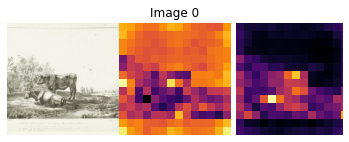

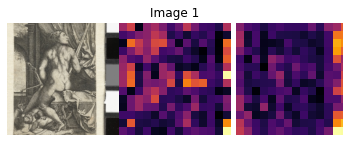

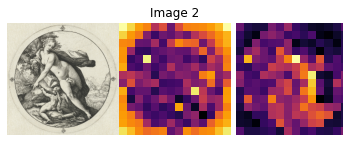

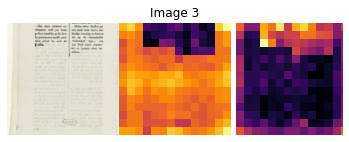

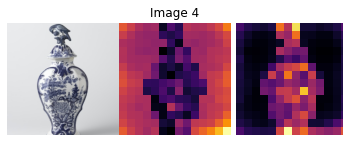

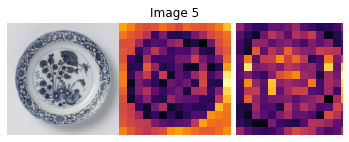

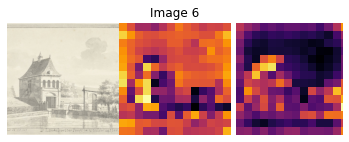

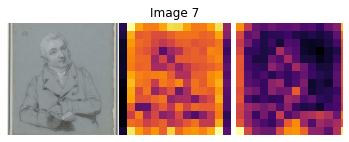

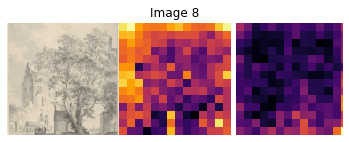

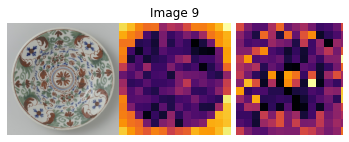

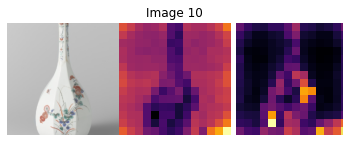

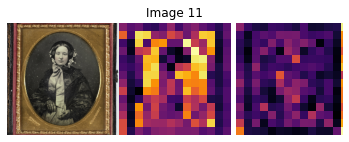

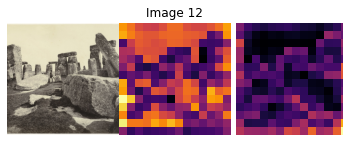

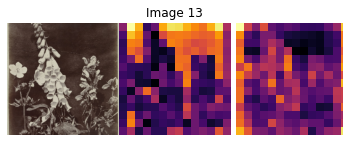

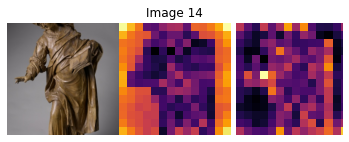

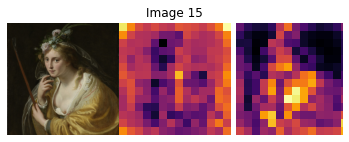

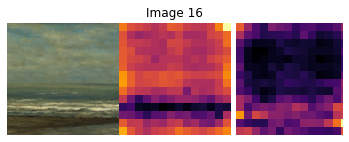

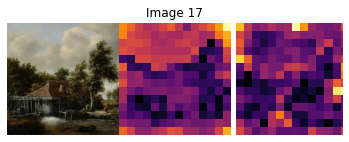

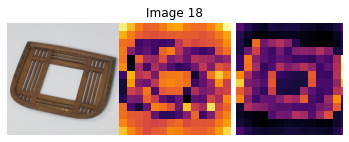

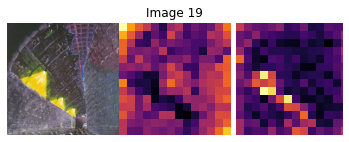

In [24]:
idx = 0
for idx in range(20):
    im = np.load(path.join(source_dir, f"img{idx:03}.npy"))
    
    with open(path.join(source_dir, f"deit_ots_img{idx:03}_layers.npy"), "br") as f:
        l = np.load(f)
        l2 = np.load(f)
    size = int(len(l) ** 0.5)
    l = l[0][1:].reshape((size, size))
    l2 = l2[0][1:].reshape((size, size))

    plt.imshow(im, extent=[0, 1, 0, 1])
    plt.imshow(l, extent=[1, 2, 0, 1], cmap="inferno")
    plt.imshow(l2, extent=[2.05, 3.05, 0, 1], cmap="inferno")
    plt.axis('off')
    plt.xlim(left=0, right=3)
    plt.title(f"Image {idx}")
    plt.show()

5 AND 19 FOR DEIT!

In [4]:
def getLayers(idx):
    layers = []
    nums = []   # Number of the layer
    num = 0
    with open(path.join(source_dir, f"swin_ots_img{idx:03}_layers.npy"), "br") as f:
        while True:
            try:
                l = np.load(f)
            except:
                break
            layers += [l]
            nums += [num]
            num += 1
    return layers, nums

In [5]:
l6, num6 = getLayers(6)
l10, num10 = getLayers(10)

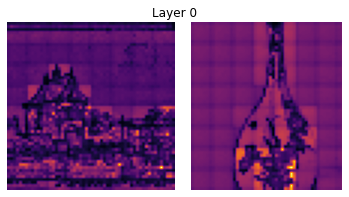

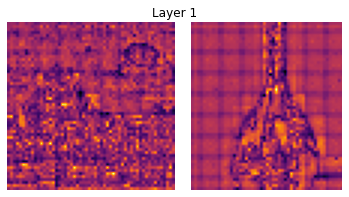

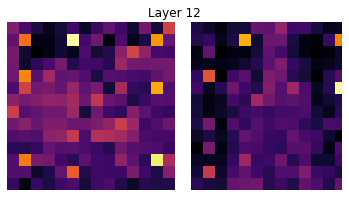

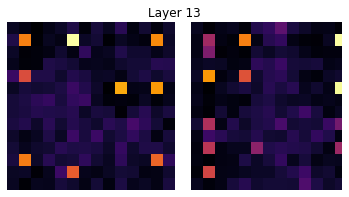

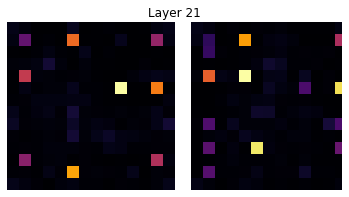

In [11]:
for idx, layer6, layer10 in zip(num6, l6, l10):
    
    if idx not in [0,1,12,13,21]: # THESE ARE THE 5 LAYERS CHOSEN!!!
        continue
    
    size = int(len(layer6) ** 0.5)
    layer6 = layer6.mean(axis=0).reshape((size, size))
    layer10 = layer10.mean(axis=0).reshape((size, size))

    plt.imshow(layer6, extent=[0, 1, 0, 1], cmap="inferno")
    plt.imshow(layer10, extent=[1.1, 2.1, 0, 1], cmap="inferno")
    plt.axis('off')
    plt.xlim(left=0, right=2)
    plt.title(f"Layer {idx}")
    plt.show()

In [19]:
def getLayers(idx):
    layers = []
    nums = []   # Number of the layer
    num = 0
    with open(path.join(source_dir, f"deit_ots_img{idx:03}_layers.npy"), "br") as f:
        while True:
            try:
                l = np.load(f)
            except:
                break
            layers += [l]
            nums += [num]
            num += 1
    return layers, nums

In [20]:
l5, num5 = getLayers(5)
l19, num19 = getLayers(19)

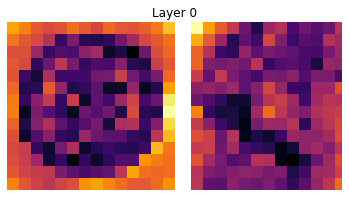

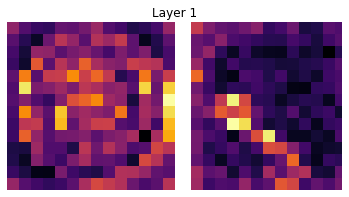

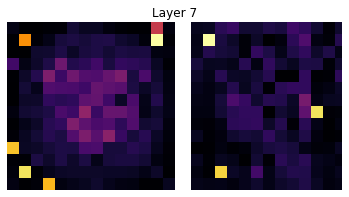

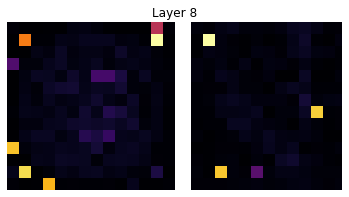

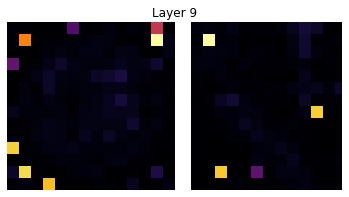

In [21]:
for idx, layer5, layer19 in zip(num5, l5, l19):
    
    if idx not in [0,1,7,8,9]: # THESE ARE THE 5 LAYERS CHOSEN!!!
        continue
    
    size = int(len(layer5) ** 0.5)
    layer5 = layer5[0, 1:].reshape((size, size))
    layer19 = layer19[0, 1:].reshape((size, size))

    plt.imshow(layer5, extent=[0, 1, 0, 1], cmap="inferno")
    plt.imshow(layer19, extent=[1.1, 2.1, 0, 1], cmap="inferno")
    plt.axis('off')
    plt.xlim(left=0, right=2)
    plt.title(f"Layer {idx}")
    plt.show()

In [7]:
# Selected layers:
swin_l = [0,1,12,13,21]
deit_l = [0,1,7,8,9]

# Leave this much space between imshows
h_space = 0.05
v_space = 0.05

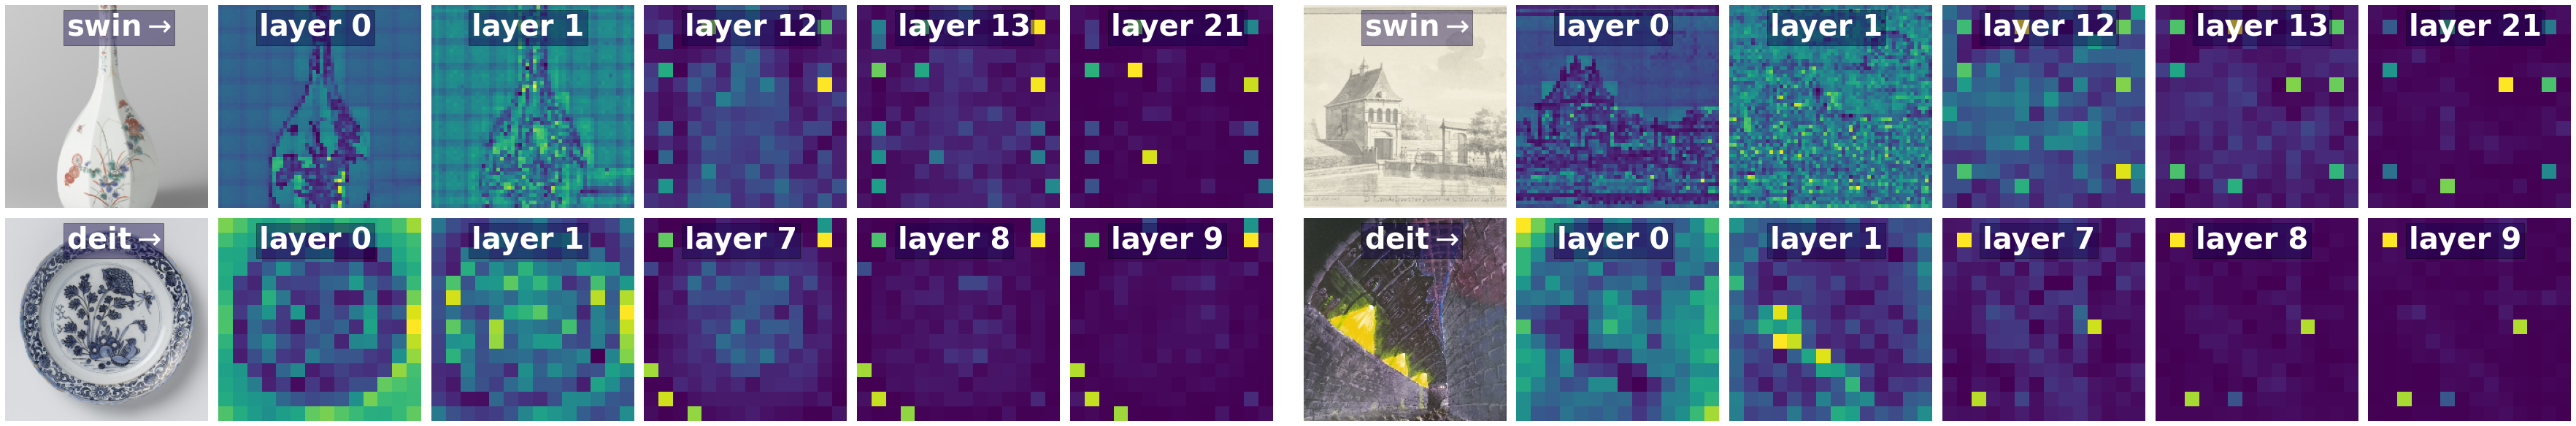

In [51]:
def plotRow(row, col, im, layers, l_idx, model_name):
    plt.imshow(im, extent=[col, col+1, row, row+1])
    
    plt.text(col + 0.3 , row + 0.85, model_name + "$\\rightarrow$", {'size':40, 'color': 'white', 'weight': 'bold'}, bbox={'facecolor': '#0c0047', 'alpha':0.4})


    col += 1 + h_space
    for idx in l_idx:
        size = int(len(layers[idx]) ** 0.5)
        if len(layers[idx]) % 2 == 1:
            im = layers[idx][0, 1:].reshape((size, size))
        else:
            im = layers[idx].mean(axis=0).reshape((size, size))
        plt.imshow(im, extent=[col, col+1, row, row+1])

        plt.text(col + 0.2 , row + 0.85, f"layer {idx}", {'size':40, 'color': 'white', 'weight': 'bold'}, bbox={'facecolor': '#0c0047', 'alpha':0.4})

        col += 1 + h_space

plotRow(0, 0, np.load(path.join(source_dir, "img010.npy")), l10, swin_l, "swin")
plotRow(0, 6 * (1 + h_space) + 2 * h_space, np.load(path.join(source_dir, "img006.npy")), l6, swin_l, "swin")

plotRow(-1 -v_space, 0, np.load(path.join(source_dir, "img005.npy")), l5, deit_l, "deit")
plotRow(-1 -v_space, 6 * (1 + h_space) + 2 * h_space, np.load(path.join(source_dir, "img019.npy")), l19, deit_l, "deit")
plt.xlim(left=0)
plt.ylim(top=1)
fig = plt.gcf()
plt.axis("off")
fig.set_size_inches(62.992126, 20) # For some reason I have to scale it to 10 times larger..
# plt.show()
plt.savefig("layers.png", format="png")